# **Manual Geometric Transformations for Augmenting Data**
This notebook provides four functions to augment data using transformations.








# Libraries

In [ ]:
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Transforming Functions

In [ ]:
def horizontal_flip(image_path, output_image_path):
    """
    Horizontally flips an image and saves the result to a specified path.

    Parameters:
    image_path : str
        The path to the input image file.
    output_image_path : str
        The path where the flipped image will be saved.

    Returns:
    None

    Notes:
    - This function uses OpenCV to read, flip, and save the image.
    - If the input image cannot be read (e.g., the file does not exist or is not an image),
      an error message is printed and the function returns None.

    Example:
    >>> horizontal_flip('input.jpg', 'flipped_output.jpg')
    """
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Could not read the image.")
        return None
    flipped_img = cv2.flip(img, 1)
    cv2.imwrite(output_image_path, flipped_img)


In [ ]:
def median_blur(image_path, output_image_path):
    """
    Applies a median blur to an image and saves the result to a specified path.

    Parameters:
    image_path : str
        The path to the input image file.
    output_image_path : str
        The path where the blurred image will be saved.

    Returns:
    None

    Notes:
    - This function uses OpenCV to read, apply a median blur, and save the image.
    - The kernel size for the median blur is fixed at 3.
    - If the input image cannot be read (e.g., the file does not exist or is not an image),
      an error message is printed and the function returns None.

    Example:
    >>> median_blur('input.jpg', 'blurred_output.jpg')
    """
    kernel = 3
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Could not read the image.")
        return None
    blurred_image = cv2.medianBlur(image, kernel)
    cv2.imwrite(output_image_path, blurred_image)


In [ ]:
def increase_contrast(image_path, output_image_path):
    """
    Increases the contrast of an image and saves the result to a specified path.

    Parameters:
    image_path : str
        The path to the input image file.
    output_image_path : str
        The path where the contrast-adjusted image will be saved.

    Returns:
    None

    Notes:
    - This function uses OpenCV to read, adjust the contrast, and save the image.
    - The contrast is increased by scaling pixel values with a fixed `alpha` value of 1.5.
    - The `beta` value for brightness adjustment is set to 0, meaning no change in brightness.
    - If the input image cannot be read (e.g., the file does not exist or is not an image),
      an error message is printed and the function returns None.

    Example:
    >>> increase_contrast('input.jpg', 'contrast_output.jpg')
    """
    alpha = 1.5
    beta = 0
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Could not read the image.")
        return None
    adjusted_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    cv2.imwrite(output_image_path, adjusted_image)


In [ ]:
def crop(image_path, output_image_path):
    """
    Crops the central region of an image and saves the result to a specified path.

    Parameters:
    image_path : str
        The path to the input image file.
    output_image_path : str
        The path where the cropped image will be saved.

    Returns:
    None

    Notes:
    - This function uses OpenCV to read, resize, and crop the image.
    - The input image is first resized to half its original width and height.
    - The central region of the resized image is then cropped.
    - If the input image cannot be read (e.g., the file does not exist or is not an image),
      an error message is printed and the function returns None.

    Example:
    >>> crop('input.jpg', 'cropped_output.jpg')
    """
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Could not read the image.")
        return None

    # Get the dimensions of the image
    height, width = img.shape[:2]

    # Resize the image to half its original dimensions
    resized_image = cv2.resize(img, (width // 2, height // 2))

    # Calculate the coordinates for cropping the central region
    crop_x = width // 4
    crop_y = height // 4

    # Crop the central region of the resized image
    cropped_image = resized_image[crop_y:crop_y + height // 2, crop_x:crop_x + width // 2]

    # Save the cropped image
    cv2.imwrite(output_image_path, cropped_image)


# Saving new images in new folder

In [ ]:
folder_path = "/Images/pars"
output_path = "/Images2/pars"
img_list = os.listdir(folder_path)
for img_name in img_list:
    img_path = os.path.join(folder_path, img_name)
    img_path_name, img_extension = os.path.splitext(img_path)

    horizontal_path = os.path.join(output_path, img_name+"h"+img_extension)
    blur_path = os.path.join(output_path, img_name+"b"+img_extension)
    contrast_path = os.path.join(output_path, img_name+"co"+img_extension)
    crop_path = os.path.join(output_path, img_name+"cr"+img_extension)

    horizontal_flip(img_path,horizontal_path)
    median_blur(img_path,blur_path)
    increase_contrast(img_path,contrast_path)
    crop(img_path,crop_path)


Error
Error
Error
Error
Error
Error
Error
Error


# Example

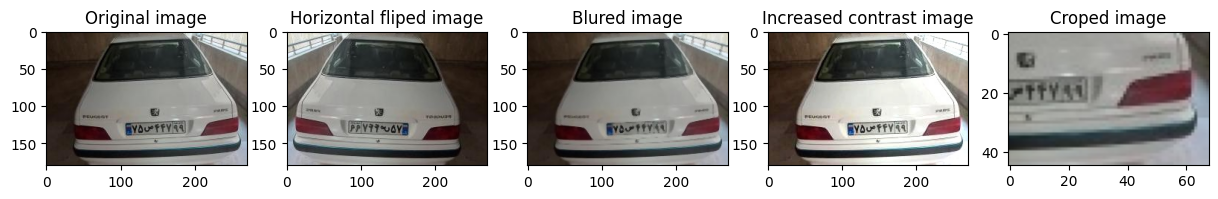

In [ ]:
original_image = mpimg.imread("/Images/pars/image3000001.jpg")
horizontal_image = mpimg.imread("/Images2/pars/image3000001.jpgh.jpg")
blur_image = mpimg.imread("/Images2/pars/image3000001.jpgb.jpg")
contrast_image = mpimg.imread("/Images2/pars/image3000001.jpgco.jpg")
crop_image = mpimg.imread("/Images2/pars/image3000001.jpgcr.jpg")

plt.figure(figsize=(15,10))

plt.subplot(151)
plt.title("Original image")
plt.imshow(original_image)

plt.subplot(152)
plt.title("Horizontal fliped image")
plt.imshow(horizontal_image)

plt.subplot(153)
plt.title("Blured image")
plt.imshow(blur_image)

plt.subplot(154)
plt.title("Increased contrast image")
plt.imshow(contrast_image)

plt.subplot(155)
plt.title("Croped image")
plt.imshow(crop_image)